In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

plotly.tools.set_credentials_file(username='glangan', api_key='yNvTP4GT1JhT7JFiL9Zg')

%matplotlib inline

In [2]:
asylum_seekers_monthly = pd.read_csv('asylum_seekers_monthly.csv')
asylum_seekers_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332189 entries, 0 to 332188
Data columns (total 5 columns):
Country / territory of asylum/residence    332189 non-null object
Origin                                     332189 non-null object
Year                                       332189 non-null int64
Month                                      332189 non-null object
Value                                      332189 non-null object
dtypes: int64(1), object(4)
memory usage: 12.7+ MB


/home/gaurav/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# Convert value to numeric and remove NaN
asylum_seekers_monthly['Value'] = pd.to_numeric(asylum_seekers_monthly['Value'], errors = 'coerce').fillna(0).astype(np.int64)
asylum_seekers_monthly.columns = ['Country', 'Origin', 'Year', 'Month', 'Value']

# Change some names
asylum_seekers_monthly.loc[asylum_seekers_monthly['Country'].str.startswith('USA'), 'Country'] = 'USA'
asylum_seekers_monthly.loc[asylum_seekers_monthly['Country'].str.startswith('United Kingdom'), 'Country'] = 'UK'
asylum_seekers_monthly.loc[asylum_seekers_monthly['Origin'].str.startswith('USA'), 'Country'] = 'USA'
asylum_seekers_monthly.loc[asylum_seekers_monthly['Origin'].str.startswith('United Kingdom'), 'Country'] = 'UK'
asylum_seekers_monthly.loc[asylum_seekers_monthly['Country'] == 'Serbia and Kosovo: S/RES/1244 (1999)', 'Origin'] = 'Serbia and Kosovo'
asylum_seekers_monthly.loc[asylum_seekers_monthly['Country'] == 'Iran (Islamic Rep. of)', 'Origin'] = 'Iran'
asylum_seekers_monthly.loc[asylum_seekers_monthly['Origin'] == 'Serbia and Kosovo: S/RES/1244 (1999)', 'Origin'] = 'Serbia and Kosovo'
asylum_seekers_monthly.loc[asylum_seekers_monthly['Origin'] == 'Iran (Islamic Rep. of)', 'Origin'] = 'Iran'

# Drop 2017
asylum_seekers_monthly = asylum_seekers_monthly.drop(asylum_seekers_monthly[asylum_seekers_monthly.Year == 2017].index)

In [4]:
asylum_seekers_monthly['Value'].describe()

count    325010.000000
mean         32.267647
std         258.838030
min           0.000000
25%           1.000000
50%           5.000000
75%          16.000000
max       36860.000000
Name: Value, dtype: float64

In [5]:
# Group by year, remove 2017
asylum_yearly = asylum_seekers_monthly.groupby(by=['Year'])['Value'].sum()

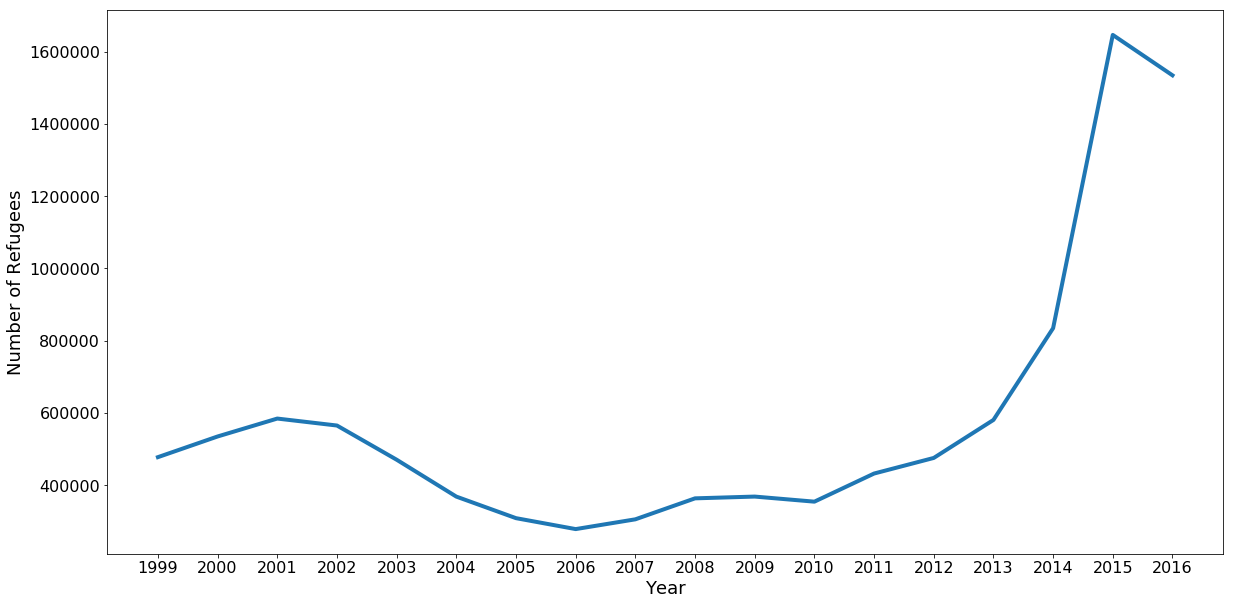

In [17]:
plt.figure(figsize=(20,10))
plt.plot(asylum_yearly, linewidth=4.0)
plt.xticks(range(1999, 2017), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Refugees', fontsize=18)
plt.savefig('total_refugees_by_year.png')
plt.show()

In [7]:
# Top countries of origin by year
asylum_origin_yearly = asylum_seekers_monthly.groupby(by=['Origin', 'Year'])['Value'].sum().reset_index()

# Top 15 countries of origin
asylum_top = asylum_origin_yearly.groupby(['Origin'])['Value'].sum().sort_values(ascending=False)[:10].reset_index()
asylum_top.head()

,Origin,Value
0,Syrian Arab Rep.,983923
1,Afghanistan,909418
2,Iraq,873376
3,Serbia and Kosovo,659148
4,China,409639


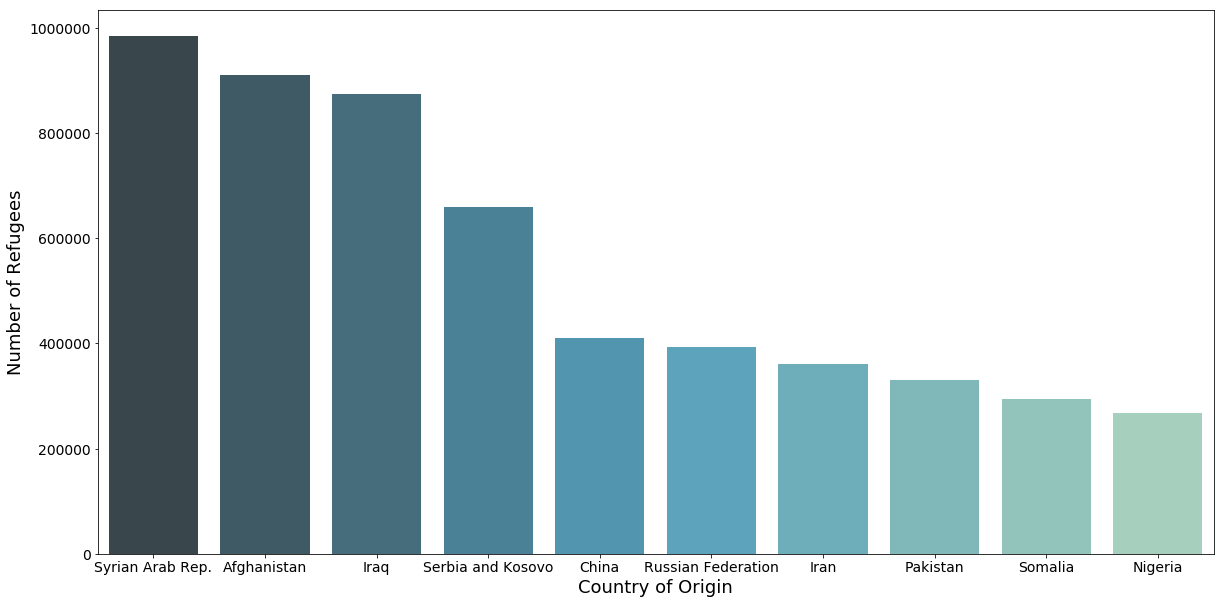

In [9]:
plt.figure(figsize=(20,10))
ax = sns.barplot(asylum_top['Origin'], asylum_top['Value'], palette='GnBu_d')
ax.set_xlabel('Country of Origin', size=18)
ax.set_ylabel('Number of Refugees', size=18)
ax.tick_params(labelsize=14)
plt.savefig('top_asylum_origin.png')
plt.show()

In [10]:
# Top countries of asylum
asylum_country_yearly = asylum_seekers_monthly.groupby(by=['Country', 'Year'])['Value'].sum().reset_index()
asylum_country_top = asylum_country_yearly.groupby(['Country'])['Value'].sum().sort_values(ascending=False)[:10].reset_index()
asylum_country_top

,Country,Value
0,Germany,2132861
1,USA,1206085
2,France,890197
3,UK,785133
4,Sweden,677954
5,Canada,476647
6,Turkey,464996
7,Austria,450579
8,Italy,410662
9,Belgium,367550


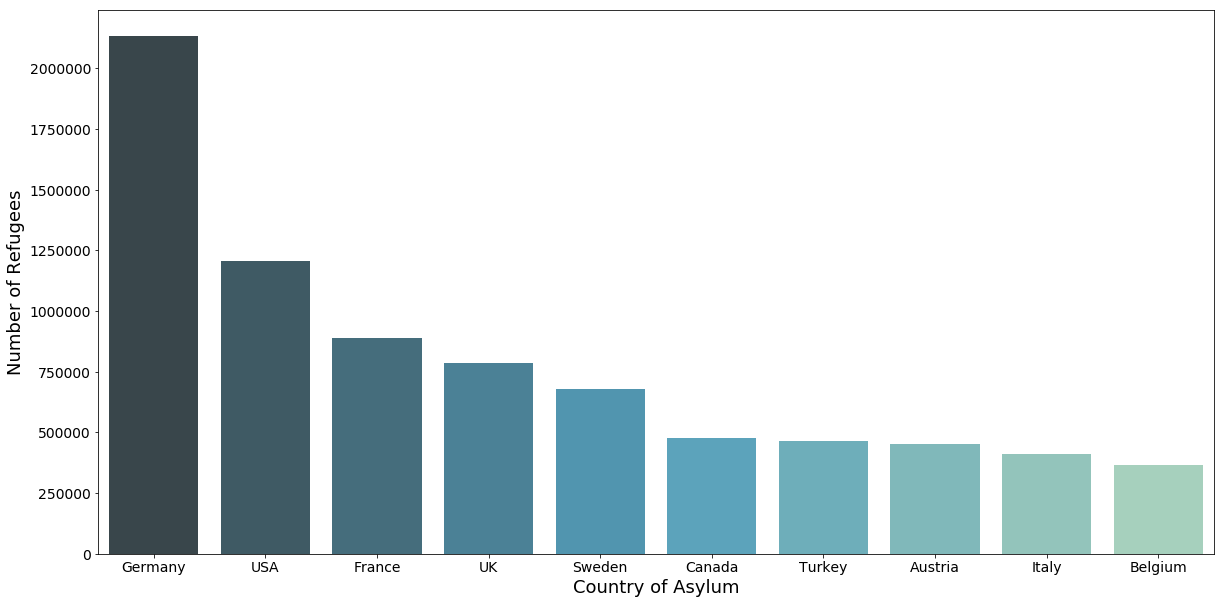

In [12]:
plt.figure(figsize=(20,10))
ax = sns.barplot(asylum_country_top['Country'], asylum_country_top['Value'], palette='GnBu_d')
ax.set_xlabel('Country of Asylum', size=18)
ax.set_ylabel('Number of Refugees', size=18)
ax.tick_params(labelsize=14)
plt.savefig('top_asylum_countries.png')
plt.show()

In [13]:
# Top 3 countries from origin of asylum
countries = ['Syrian Arab Rep.', 'Afghanistan', 'Iraq']
asylum_origin_top3 = asylum_origin_yearly[asylum_origin_yearly['Origin'].isin(countries)]
asylum_origin_top3.head()

,Origin,Year,Value
0,Afghanistan,1999,25053
1,Afghanistan,2000,31609
2,Afghanistan,2001,53203
3,Afghanistan,2002,26498
4,Afghanistan,2003,14282


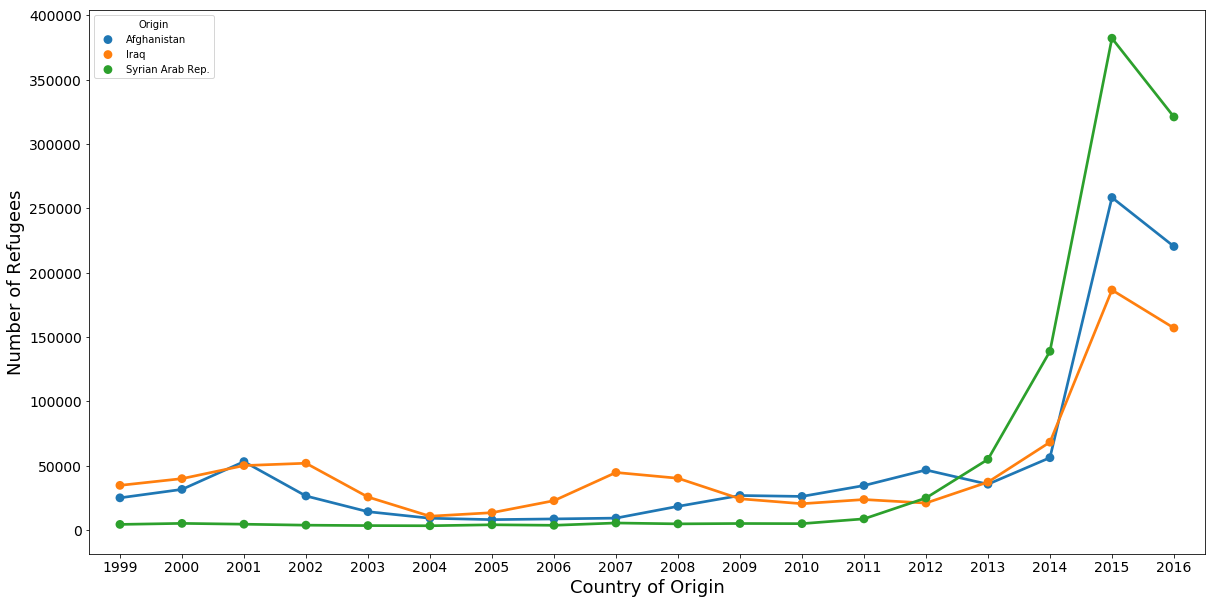

In [15]:
plt.figure(figsize=(20,10))
ax = sns.pointplot(data=asylum_origin_top3, x='Year', y='Value', hue='Origin')
ax.set_xlabel('Country of Origin', size=18)
ax.set_ylabel('Number of Refugees', size=18)
ax.tick_params(labelsize=14)
plt.savefig('top_3_origin.png')
plt.show()

In [16]:
# Asylum seekers World map 2006
asylum_2006 = asylum_origin_yearly[asylum_origin_yearly.Year == 2006]
asylum_2006 = asylum_2006.drop('Year', 1)

In [164]:
data = [ dict(
        type = 'choropleth',
        locations = asylum_2006['Origin'],
        z = asylum_2006['Value'],
        text = asylum_2006['Origin'],
        locationmode = 'country names',
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Number of Asylum Seekers'),
      ) ]

layout = dict(
    title = 'Asylum seekers in 2006',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='asylum-2006' )

In [165]:
# Asylum seekers World map 2016
asylum_2006 = asylum_origin_yearly[asylum_origin_yearly.Year == 2016]
asylum_2006 = asylum_2006.drop('Year', 1)

In [166]:
data = [ dict(
        type = 'choropleth',
        locations = asylum_2006['Origin'],
        z = asylum_2006['Value'],
        text = asylum_2006['Origin'],
        locationmode = 'country names',
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Number of Asylum Seekers'),
      ) ]

layout = dict(
    title = 'Asylum seekers in 2016',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='asylum-2016' )